In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/Users/samlioglumerve/Downloads/case_study_junior_ds (1).csv')

In [5]:
# Let's explore our data a bit with simple commands first, mainly to understand patterns, duplicates (if there are any), 
# and see of we already have the data for keyword_rank = 1

df.head()

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0


In [6]:
df.describe()

,keyword_id,keyword_rank,searches,search_engine
count,4.693080e+05,4.693080e+05,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,8.550373e+03,6.818188
std,1.290018e+12,1.388063e+06,8.279563e+04,5.185202
min,5.850000e+03,3.000000e+00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,1.863716e+07,25.000000


In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,keyword_id,keyword_rank,searches,search_engine
count,469308.00,469308.00,469308.00,469308.00
mean,1955014157473.05,743900.92,8550.37,6.82
std,1290017544552.18,1388062.62,82795.63,5.19
min,5850.00,3.00,0.00,0.00
25%,798864189363.00,74218.50,0.00,3.00
50%,1838246099350.00,236095.50,0.00,5.00
75%,3049427040687.00,782101.00,3000.00,10.00
max,4389457074807.00,13911821.00,18637157.00,25.00


In [9]:
# Looking at these findings we can already understand that the observed data has quite a lot of variance due to high standard deviation.
# The keyword with rank 1 is not already present in the dataset as the min keyword_rank available is 3 but I will execute few more codes to verify this.

In [10]:
keyword_rank_1_df = df[df['keyword_rank'] == 1]
print(keyword_rank_1_df)

Empty DataFrame
Columns: [keyword_id, keyword_rank, date, searches, search_engine]
Index: []


In [11]:
# we could be missing out some data if not all data types are formatted as integer so let's verify that
df['keyword_rank'] = df['keyword_rank'].astype(int)

keyword_rank_1_exists = (df['keyword_rank'] == 1).any()
if keyword_rank_1_exists:
    print("There is at least one row where keyword_rank equals 1.")
else:
    print("There is no row where keyword_rank equals 1.")

There is no row where keyword_rank equals 1.


In [12]:
# We now verified that we cannot find the number of searches the keyword with rank 1 would receive per each search engine just looking at the available data.
# It means we need to explore the relationships between the available variables and execute a predictive model to estimate number of searches
# keyword with rank 1 would receive.

In [14]:
# Exploring the relationship between keyword_rank and searches.

X = df[['keyword_rank']].values
y = df['searches'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4747324308.977954


In [16]:
# Since mean squared error is high, it suggests that linear regression line for the relatipnship between these two variables won't be a well fitting one.
# It means there are also lots of outliers where lower ranking (closer to 0) does not necessarily indicate higher searches and there are other variables affecting number of searches.

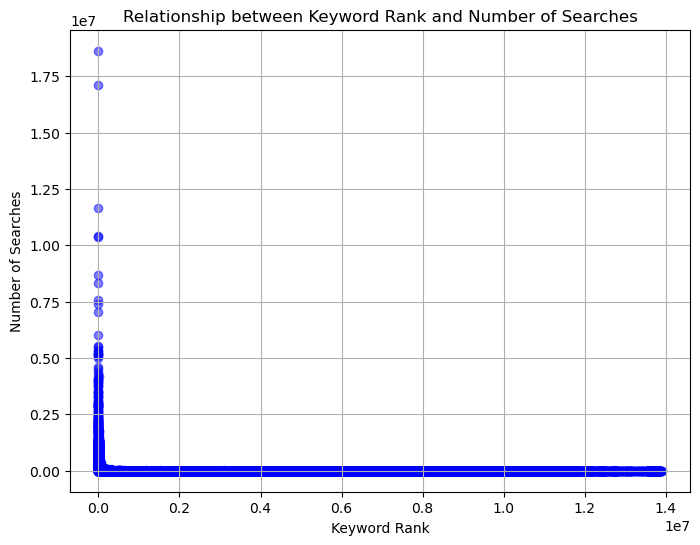

In [17]:
# Plot for relationship between searches & keyword rank
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('Relationship between Keyword Rank and Number of Searches')
plt.xlabel('Keyword Rank')
plt.ylabel('Number of Searches')
plt.grid(True)
plt.show()

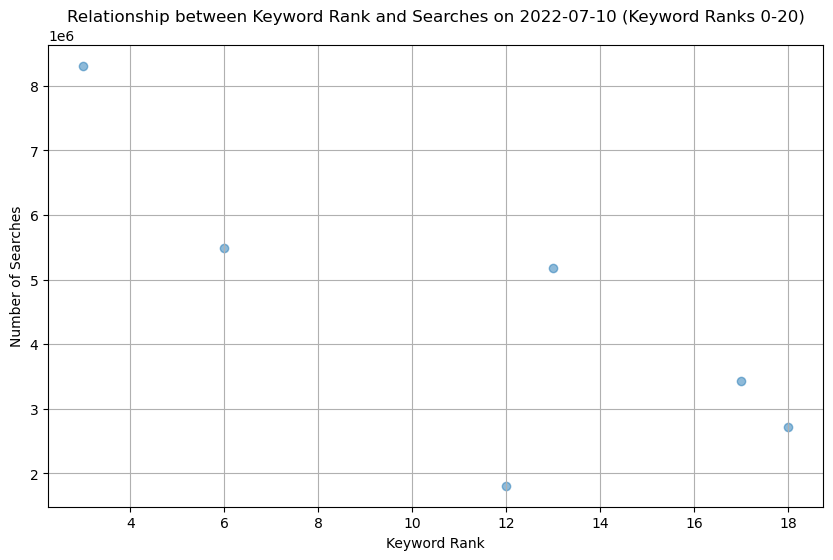

In [18]:
# I'll focus on a smaller sample to see the visual pattern better

# for instance let's also pick a certain date to have some control group and analyze the relationship between 2 variables better.
# I'll also restrict the dataset to variables with rank 0-20 only to be able to see visual pattern better.

date_to_explore = '2022-07-10'
data_for_date_and_rank = df[(df['date'] == date_to_explore) & (df['keyword_rank'].between(0, 20))]
plt.figure(figsize=(10, 6))
plt.scatter(data_for_date_and_rank['keyword_rank'], data_for_date_and_rank['searches'], alpha=0.5)
plt.title(f'Relationship between Keyword Rank and Searches on {date_to_explore} (Keyword Ranks 0-20)')
plt.xlabel('Keyword Rank')
plt.ylabel('Number of Searches')
plt.grid(True)
plt.show()

In [20]:
# As demonstrated by the graph, there's indeed some sort of negative relationship between keyword rank and number of searches, where closer to 0 rank result in higher searches.
# However, relationship is not too strong as there are outliers, for example, keyword with rank 18 seems to have higher searches than rank 12.
# From here we understand that search engine could be another factor affecting the number of searches.

In [21]:
rows_for_date_and_rank = df[(df['date'] == '2022-07-10') & (df['keyword_rank'].between(0, 20))]
print(rows_for_date_and_rank)

           keyword_id  keyword_rank        date  searches  search_engine
140933  3985729678088            17  2022-07-10   3430634              4
192757   309238066050            18  2022-07-10   2718845              4
294612  1606317975332            12  2022-07-10   1807732              8
402936  1554778255514             3  2022-07-10   8312244             13
414334   566935803698             6  2022-07-10   5496631             13
468197  3212635610681            13  2022-07-10   5180843             25


In [22]:
# Looking at this small sample of data, although higher searches usually also have higher search engine, there are outliers to this relationship
# as well as keyword with rank 12 has lowest number of searches than rank 18, despite having higher search engine as well.

In [23]:
# Calculating the searches per search engine for each row can be a way to even out search engine variable, however we have limited knowledge 
# about search engines, and not each search engine might contribute to search number with the same weight for a single keyword_id.

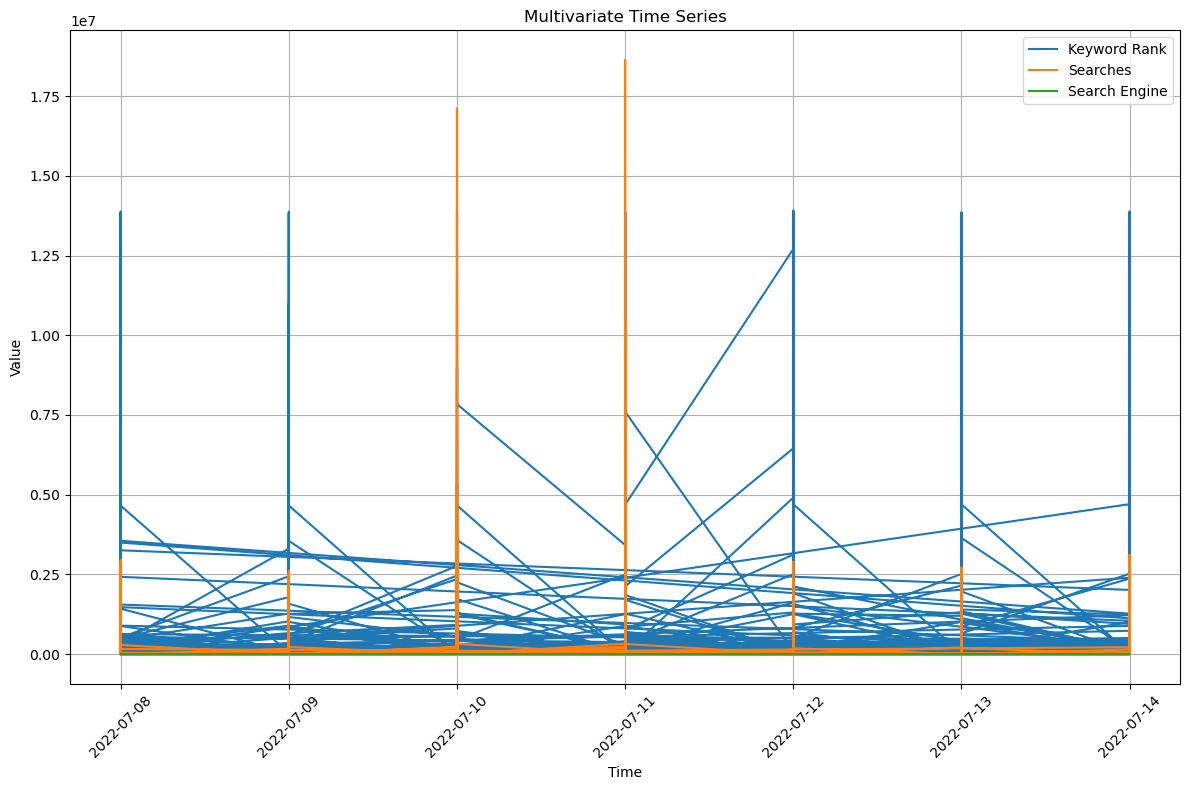

In [24]:
# Multivariate time series for all these variables:
df['date'] = pd.to_datetime(df['date'])


plt.figure(figsize=(12, 8))


plt.plot(df['date'], df['keyword_rank'], label='Keyword Rank')


plt.plot(df['date'], df['searches'], label='Searches')


plt.plot(df['date'], df['search_engine'], label='Search Engine')


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

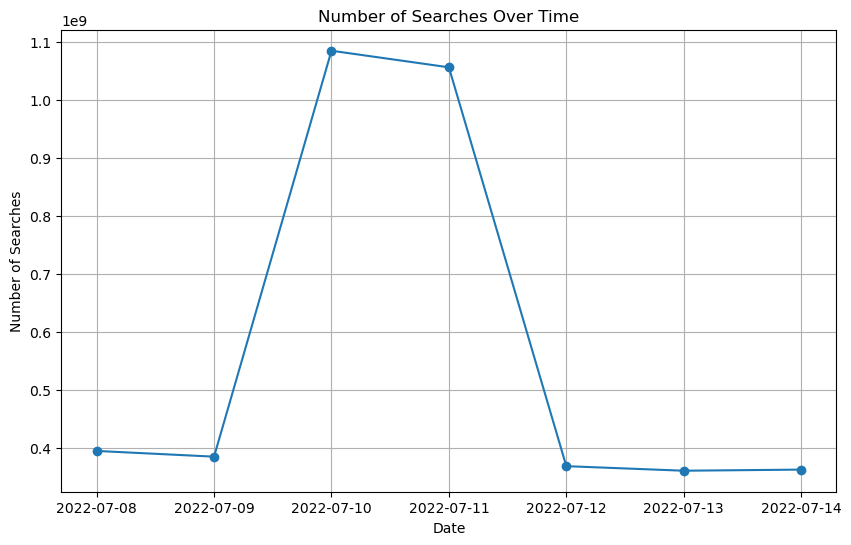

In [25]:
# Let's find seasonal patterns on the data, such as which day in July has the highest searches

df['date'] = pd.to_datetime(df['date'])
searches_by_date = df.groupby('date')['searches'].sum()
plt.figure(figsize=(10, 6))
plt.plot(searches_by_date, marker='o', linestyle='-')
plt.title('Number of Searches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Searches')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


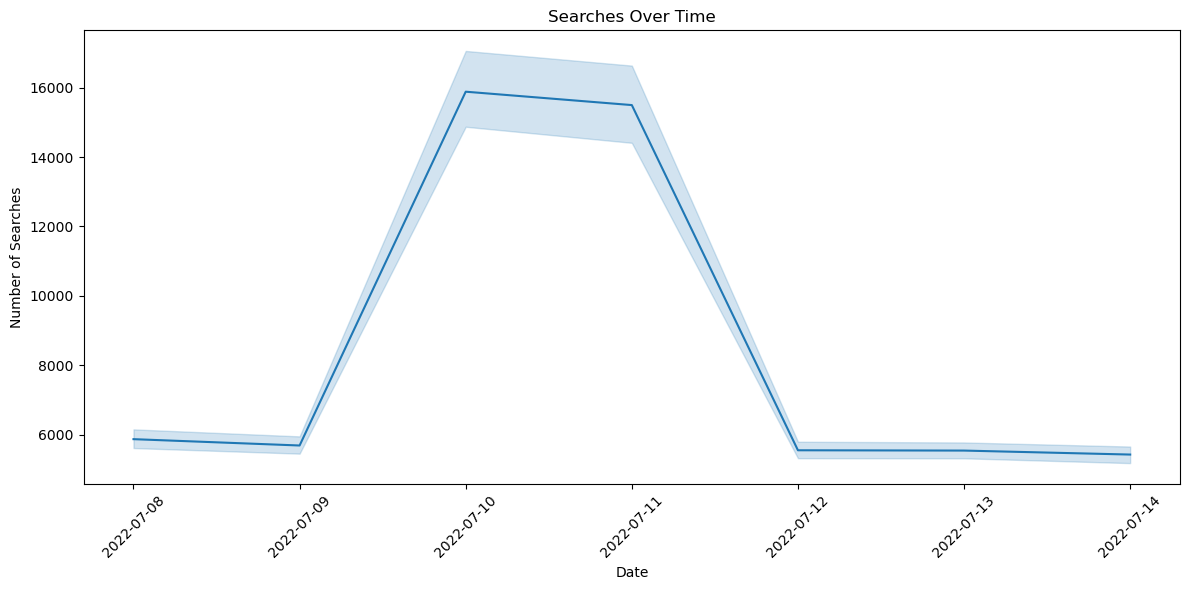

In [26]:
# another one with seaborn

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='searches')
plt.title('Searches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# It seems like number of searches peaked on the 10th of July, followed by 11th. Other dates have similar search numbers that are significantly lower than these two dates.

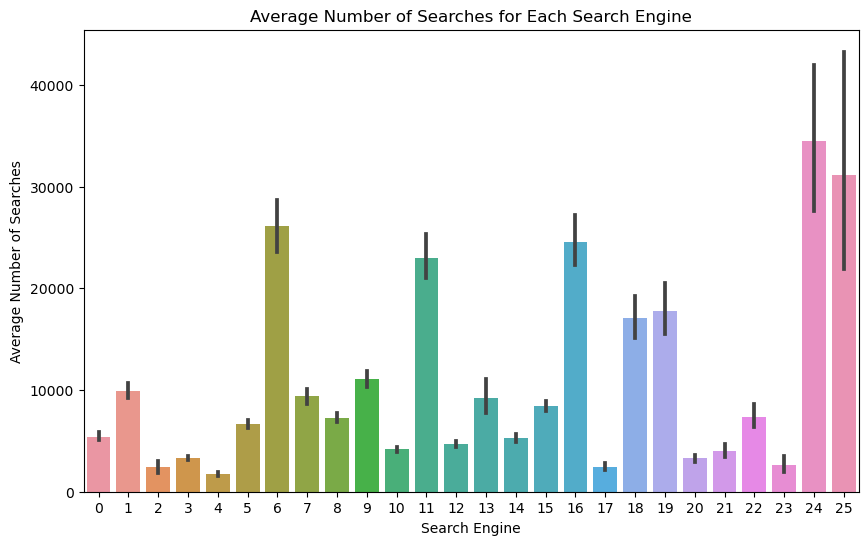

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='search_engine', y='searches', estimator=np.mean)
plt.title('Average Number of Searches for Each Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Average Number of Searches')
plt.show()

In [29]:
#I'd like to also check if there are repeated keyword IDs (duplicates) and if yes how the searches for same keyword id vary for each date

In [30]:
if df['keyword_id'].duplicated().any():
    print("Duplicate keyword IDs exist.")
else:
    print("No duplicate keyword IDs.")

Duplicate keyword IDs exist.


In [31]:
num_duplicate_keyword_ids = df['keyword_id'].duplicated().sum()
print("Number of duplicate keyword IDs:", num_duplicate_keyword_ids)

Number of duplicate keyword IDs: 360165


In [32]:
keyword_id_counts = df['keyword_id'].value_counts()
top_5_repeated_keyword_ids = keyword_id_counts.head(5)
print("Top 5 most repeated keyword IDs:")
print(top_5_repeated_keyword_ids)

Top 5 most repeated keyword IDs:
keyword_id
338145           7
1047972443081    7
1245540972390    7
1039382444610    7
17180365878      7
Name: count, dtype: int64


In [33]:
rows_with_keyword_id_338145 = df[df['keyword_id'] == 338145]
print(rows_with_keyword_id_338145)

       keyword_id  keyword_rank       date  searches  search_engine
0          338145         25218 2022-07-08     53000              0
4617       338145         39268 2022-07-09     28016              0
9230       338145         12646 2022-07-10    226351              0
13965      338145         12538 2022-07-11    228183              0
18645      338145         15452 2022-07-12     32157              0
23163      338145         22548 2022-07-13     28200              0
27633      338145         24266 2022-07-14     38054              0


In [34]:
# So same keyword_id received different searches based on the date and was ranked differently when search engine is constant.

In [38]:
#Let's build a predictive model using regression analysis.
#Since date also influences number of searches, and searches for keyword with rank 1 would vary depending on the day, I'll restrict the date to a specific date.
#I'll pick the day with highest number of searches (2022-07-10) to set a control group and avoid too many variables. And filter data accordingly.
#Independent variables: search engine, keyword_id, date, keyword_Rank
#Dependent variables: searches

df_filtered = df[(df['date'] == '2022-07-10') & (df['search_engine'] == 1)]


X = df_filtered[['keyword_id', 'keyword_rank']]
y = df_filtered['searches']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

keyword_rank_1_searches = model.predict([[1, 1]])  # Assuming keyword_id = 1 for simplicity
print("Predicted number of searches for keyword rank 1:", keyword_rank_1_searches[0])

Mean Squared Error: 8982714865.785856
Predicted number of searches for keyword rank 1: 42420.36488423707


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
filtered_df = df[(df['date'] == '2022-07-10') & (df['search_engine'] == 1)]

sorted_df = filtered_df.sort_values(by='searches', ascending=False)

print(sorted_df.head(20))

          keyword_id  keyword_rank       date  searches  search_engine
73316   704374905883            57 2022-07-10   7419497              1
73892   627065429676           460 2022-07-10   2259000              1
53681   592705997502           399 2022-07-10   2116219              1
56500    51539898563           729 2022-07-10   1389487              1
53343   274878120379          1265 2022-07-10   1052952              1
55013  1245540977434          1254 2022-07-10   1006128              1
56241   721554744029          1700 2022-07-10    912208              1
73503  1597727951867          2577 2022-07-10    821738              1
73875   146029319674          2000 2022-07-10    801339              1
54117  1546188498256          2123 2022-07-10    769779              1
53307    68719672700          1954 2022-07-10    742928              1
53639   223338399967          1740 2022-07-10    713000              1
55112  2911987951104          2051 2022-07-10    703081              1
53433 

In [40]:
filtered_df = df[(df['date'] == '2022-07-10') & (df['search_engine'] == 1)]

sorted_df = filtered_df.sort_values(by='searches', ascending=False)
top_20_df = sorted_df.head(20)

X = top_20_df['keyword_rank'].values.reshape(-1, 1)  # Reshape for single feature
y = top_20_df['searches'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

keyword_rank_1_searches = model.predict([[1]])
print("Predicted number of searches for keyword rank 1:", keyword_rank_1_searches[0])

Mean Squared Error: 8879898649085.705
Predicted number of searches for keyword rank 1: 1544334.8384756232


In [41]:
# Despite restricting date and search engine values to constant values, keywords are not evenly ranked most to least searched.
# For ex, keyword with rank 460 has higher searches than keyword ranked 399.
# In this regard, high mean squarred error in the data set and outliers suggest that there are other factors influencing number of searches other than date and search engine.
# For example, it could have to do with specific search engine or another variable.
# Therefore, we will never be able to build a well fitting predictive linear regression in this case. 
# But of course this could also be due to the fact that there's no linear relationship between these variables but a polynomial one, let's test that.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.

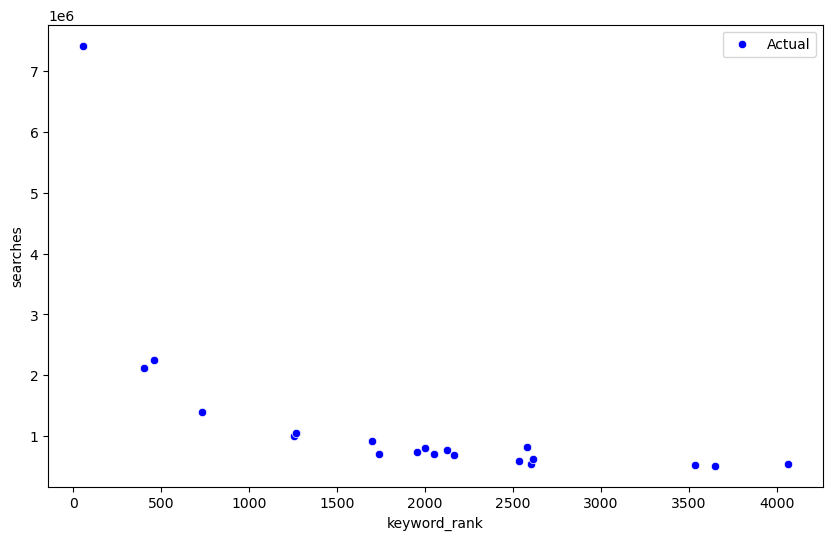

In [45]:
# Plot for polynomial regression 

sorted_df = top_20_df.sort_values(by='keyword_rank')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='keyword_rank', y='searches', data=sorted_df, color='blue', label='Actual')

X_poly = poly_features.transform(sorted_df['keyword_rank'].values.reshape(-1, 1))
y_poly_pred = model.predict(X_poly)
sorted_indices = np.argsort(sorted_df['keyword_rank'])
plt.plot(sorted_df['keyword_rank'].values[sorted_indices], y_poly_pred[sorted_indices], color='red', label='Polynomial Regression')

plt.title('Polynomial Regression Visualization')
plt.xlabel('Keyword Rank')
plt.ylabel('Searches')
plt.legend()
plt.show()

In [46]:
#Predicting the searched for keyword ranking 1 with polynomial model within the restricted sample.
filtered_df = df[(df['date'] == '2022-07-10') & (df['search_engine'] == 1)]

sorted_df = filtered_df.sort_values(by='searches', ascending=False)

top_20_df = sorted_df.head(20)

X = top_20_df['keyword_rank'].values.reshape(-1, 1)
y = top_20_df['searches'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_pred = model.predict(X_poly_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

keyword_rank_1_searches = model.predict(poly_features.transform([[1]]))
print("Predicted number of searches for keyword rank 1:", keyword_rank_1_searches[0])

Mean Squared Error: 6871077221303.738
Predicted number of searches for keyword rank 1: 2258524.0348271155


In [47]:
# Even though this model is also not a well fitting one based on the high MSE, it's still better than the linear model as MSE is lower.
# Also, given the max search values in the previous table with first 20 rows, this search amount is more plausible.

In [48]:
rows_with_keyword_id_338145 = df[df['keyword_id'] == 338145]
print(rows_with_keyword_id_338145)

       keyword_id  keyword_rank       date  searches  search_engine
0          338145         25218 2022-07-08     53000              0
4617       338145         39268 2022-07-09     28016              0
9230       338145         12646 2022-07-10    226351              0
13965      338145         12538 2022-07-11    228183              0
18645      338145         15452 2022-07-12     32157              0
23163      338145         22548 2022-07-13     28200              0
27633      338145         24266 2022-07-14     38054              0


In [50]:
rows_with_keyword_id_1047972443081 = df[df['keyword_id'] == 1047972443081]
print(rows_with_keyword_id_1047972443081)

           keyword_id  keyword_rank       date  searches  search_engine
264137  1047972443081         62753 2022-07-08      5040              7
266849  1047972443081         79998 2022-07-09      4039              7
269524  1047972443081         67347 2022-07-10      5064              7
272174  1047972443081         83377 2022-07-11      1000              7
274772  1047972443081        116018 2022-07-12         0              7
277343  1047972443081        106235 2022-07-13      3000              7
279955  1047972443081         80804 2022-07-14      5076              7


In [51]:
rows_with_keyword_id_1245540972390 = df[df['keyword_id'] == 1245540972390]
print(rows_with_keyword_id_1245540972390)

           keyword_id  keyword_rank       date  searches  search_engine
128703  1245540972390        983429 2022-07-08         0              4
137424  1245540972390        242677 2022-07-09      1000              4
146118  1245540972390        465776 2022-07-10         0              4
154907  1245540972390        349537 2022-07-11      1000              4
163369  1245540972390        444554 2022-07-12         0              4
171620  1245540972390        553325 2022-07-13      1083              4
180108  1245540972390         98679 2022-07-14      2000              4


In [72]:
max_searches_idx = df.groupby('date')['searches'].idxmax()

rows_with_max_searches = df.iloc[max_searches_idx]

print(rows_with_max_searches)

          keyword_id  keyword_rank       date  searches  search_engine
359834  910533449676            62 2022-07-08   2938722             11
362556  910533449676            66 2022-07-09   2615729             11
365307  910533449676            29 2022-07-10  17117887             11
368042  910533449676            22 2022-07-11  18637157             11
370771  910533449676            18 2022-07-12   2890242             11
373461  910533449676            27 2022-07-13   2713843             11
376142  910533449676            32 2022-07-14   3113288             11


In [77]:
# seems like the search engine number for the same keyword_id is constant.
# We also observe that the most influential factor affecting searches is the "date" variable here. As we plotted before 2022-07-10 is the date with highest searches for the most part.
# Although once again there are outliers, for ex for keyword_id 1245540972390, 10th day has 0 searches. This might imply that 4th some search engines are not used in specific days.
# Due to high number of outliers within each relationship, we cannot perfectly estimate the number of searches for keyword ranked 1 would receive.
# But we can state with a higher confidence that the searches for keyword ranked 1 will be highest on 10th of July or 11th.
# And since the highest searched keyword for all the avaulable dates has search engine 11, the keyword ranking 1 is likely to have search engine 11 as well.
# However it's difficult to estimate the exact number of searches for keyword ranking 1 due to high sd & outliers in the sample.